In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/business-flight-tracking-trends-main/data/Flight_data.csv


/content/drive/MyDrive/business-flight-tracking-trends-main/data/Flight_data.csv


In [ ]:
!pwd

/content


In [ ]:
 # Importing necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Load the dataset
# Get the directory of the current script
# Construct the path to the data file using relative paths (VS CODE)

#data_file_path = os.path.join('..', 'data', 'Flight_data.csv')

# Load the dataset
flight_data = pd.read_csv("/content/drive/MyDrive/business-flight-tracking-trends-main/data/Flight_data.csv")

In [ ]:
# Feature analysis
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_features = ['Departure City', 'Arrival City', 'Origin', 'Destination', 'Churned']
for feature in categorical_features:
    flight_data[feature] = label_encoder.fit_transform(flight_data[feature])


In [ ]:
# Manual encoding for 'Booking Class' and 'Frequent Flyer Status'
# Mapping 'Booking Class' to numbers: 1 for Economy, 2 for Business, 3 for First
booking_class_mapping = {'Economy': 1, 'Business': 2, 'First': 3}
flight_data['Booking Class'] = flight_data['Booking Class'].map(booking_class_mapping)

# Mapping 'Frequent Flyer Status' to numbers: 1 for Gold, 2 for Platinum, 3 for Silver
frequent_flyer_status_mapping = {'Gold': 1, 'Platinum': 2, 'Silver': 3}
flight_data['Frequent Flyer Status'] = flight_data['Frequent Flyer Status'].map(frequent_flyer_status_mapping)

In [ ]:
# Drop unused features
#Customer ID, Name, Route are disregarded because they are irrelevant to our goal here
flight_data.drop(['Customer ID', 'Name', 'Route', 'Delay Minutes'], axis=1, inplace=True)

In [ ]:
# Convert Departure Date to datetime
flight_data['Departure Date'] = pd.to_datetime(flight_data['Departure Date'])
# Create new features for month and year from Departure Date
flight_data['Departure Month'] = flight_data['Departure Date'].dt.month
flight_data['Departure Year'] = flight_data['Departure Date'].dt.year #maybe increase importance?
# Drop irrelevant columns
flight_data.drop(['Departure Date'], axis=1, inplace=True)

In [ ]:
# Split dataset into features and target variable
X = flight_data.drop(['Profitability'], axis=1) #these are the features, all columns except profitability
y = flight_data['Profitability'] #this is our TARGET!!

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
rf_regressor = RandomForestRegressor(random_state=42) # fixed number 42 is fixing the randomness in processes like data splitting (in train-test splits),
#model initialization, or any other operation that involves random number generation.
#This makes  results consistent across different runs of the code
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred_train = rf_regressor.predict(X_train_scaled)
y_pred_test = rf_regressor.predict(X_test_scaled)

In [ ]:
# Calculate RMSE
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))


In [ ]:
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 0.11115922735326832
Test RMSE: 0.28594596520929405


In [ ]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_regressor.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                  Feature  Importance
5            Ticket Price    0.162119
0          Departure City    0.147916
6        Competitor Price    0.122050
1            Arrival City    0.114780
2         Flight Duration    0.114549
7                  Demand    0.097420
10         Loyalty Points    0.084867
3           Booking Class    0.044031
4   Frequent Flyer Status    0.038914
11                Churned    0.021044
8                  Origin    0.020274
9             Destination    0.016641
12        Departure Month    0.015394
13         Departure Year    0.000000


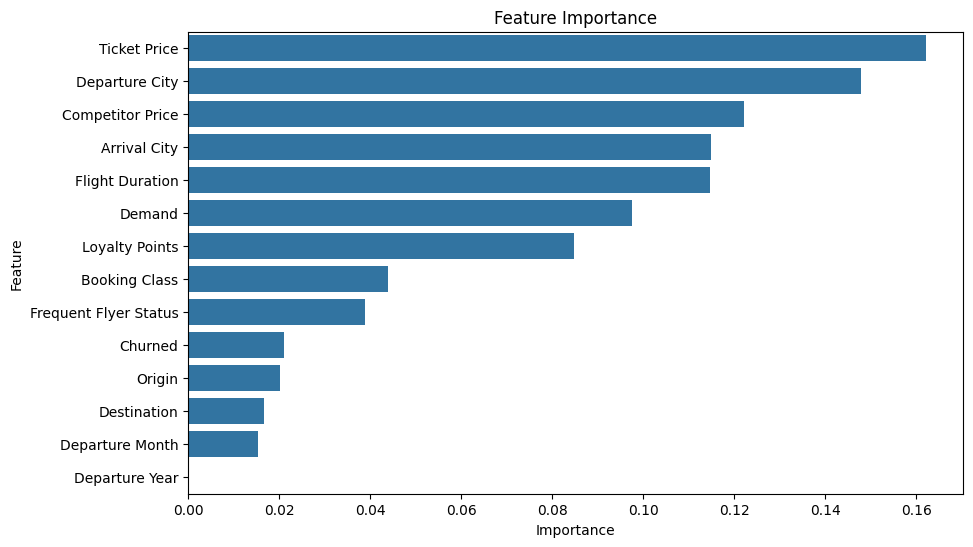

In [ ]:
# Feature Importance Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.show()

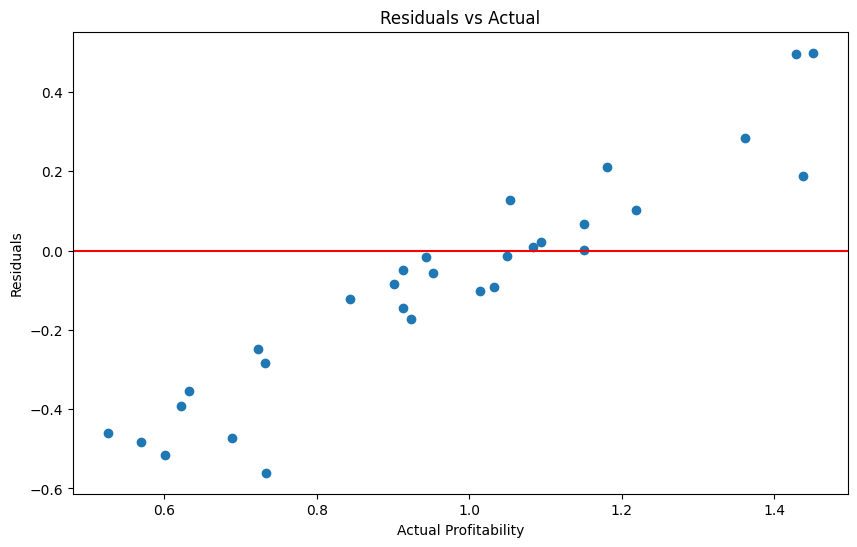

In [ ]:
# Residuals Plot
#Residuals are the differences between the observed values of the dependent variable and the values predicted by the model.
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.title("Residuals vs Actual")
plt.xlabel("Actual Profitability")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [ ]:
#Ask the user to input data for a new flight
print("Enter details for the new flight:")
departure_city = input("Departure City: ")
arrival_city = input("Arrival City: ")
flight_duration = float(input("Flight Duration (hours): "))
booking_class = int(input("Booking Class (1 for Economy, 2 for Business, 3 for First): "))
frequent_flyer_status = int(input("Frequent Flyer Status (1 for Gold, 2 for Platinum, 3 for Silver): "))
ticket_price = float(input("Ticket Price: "))
competitor_price = float(input("Competitor Price: "))
demand = int(input("Demand (1-20): "))
demand = demand * 0.1 if ticket_price <= competitor_price else demand * -0.1
origin = input("Origin: ")
destination = input("Destination: ")
loyalty_points = int(input("Loyalty Points: "))
churned = int(input("Churned (0 for No, 1 for Yes): "))
departure_month = int(input("Departure Month: "))
departure_year = int(input("Departure Year: "))

Enter details for the new flight:
Departure City: New York
Arrival City: Los Angeles
Flight Duration (hours): 4
Booking Class (1 for Economy, 2 for Business, 3 for First): 2
Frequent Flyer Status (1 for Gold, 2 for Platinum, 3 for Silver): 2
Ticket Price: 100
Competitor Price: 150
Demand (1-20): 10
Origin: NYC
Destination: LAX
Loyalty Points: 5000
Churned (0 for No, 1 for Yes): 1
Departure Month: 4
Departure Year: 2024


In [ ]:
# Create a DataFrame for the new flight data
new_data = pd.DataFrame({
    'Departure City': [departure_city],
    'Arrival City': [arrival_city],
    'Flight Duration': [flight_duration],
    'Booking Class': [booking_class],
    'Frequent Flyer Status': [frequent_flyer_status],
    'Ticket Price': [ticket_price],
    'Competitor Price': [competitor_price],
    'Demand': [demand],
    'Origin': [origin],
    'Destination': [destination],
    'Loyalty Points': [loyalty_points],
    'Churned': [churned],
    'Departure Month': [departure_month],
    'Departure Year': [departure_year]
})

In [ ]:
# Encode the new flight data using the same LabelEncoder (for those fields that need it)
new_data['Departure City'] = label_encoder.transform(new_data['Departure City'])
new_data['Arrival City'] = label_encoder.transform(new_data['Arrival City'])
new_data['Origin'] = label_encoder.transform(new_data['Origin'])
new_data['Destination'] = label_encoder.transform(new_data['Destination'])
new_data['Churned'] = label_encoder.transform(new_data['Churned'])

In [ ]:
# Scale the features
new_data_scaled = scaler.transform(new_data)

In [ ]:
# Calculate the expected profitability based on the training data
expected_profitability = y_train.mean()
print("\nExpected Profitability (based on training data):", expected_profitability)


Expected Profitability (based on training data): 1.0603719943714285


In [ ]:
# Predict the profitability for the new flight data
predicted_profitability = rf_regressor.predict(new_data_scaled)[0]
print("Predicted Profitability for the new flight:", predicted_profitability)

Predicted Profitability for the new flight: 0.9930085932699998
